In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
#from arch.unitroot import DFGLS
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.gridspec as gridspec

In [3]:
# Cargo el data set de Precios y Dinero
# m_en_ars, es la base monetaria promedio del mes expresada en millones de pesos
# m, dinero, contiene los mismos datos pero con base 100
# ipc, los valores del indice de precioas al consumidor normalizados

df = pd.read_excel('Precios_y_Dinero.xlsx', sheet_name='Hoja1', usecols='A:D')
df.head()

,MMYY,IPC,M,M_en_ARS
0,2003-01-01,100.000000,100.000000,29609.920333
1,2003-02-01,100.566796,99.359830,29420.366429
2,2003-03-01,101.155116,102.628052,30388.084290
3,2003-04-01,101.212513,104.258927,30870.985333
4,2003-05-01,100.817908,111.804321,33105.170323


Ejercicio 1: 
Realice un gráfico de la serie de tiempo de “m” e “ipc”. Muestre el gráfico. ¿Qué le sugiere?

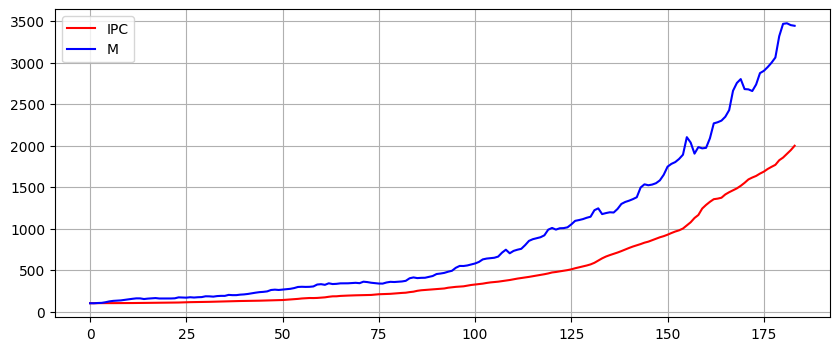

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(df["IPC"], label="IPC", color='red')
plt.plot(df["M"], label="M", color='blue')
plt.legend()
plt.grid(True)
plt.show()

# Se puede observar que ambas no son estacionarias

Ejercicio 2: verifique el orden de integración de ipc usando el test de raíces unitarias de Dickey Fuller aumentado (ADF).

Los tests de raíces unitarias se utilizan para determinar el orden de integración de una serie de tiempo. Cuando una serie es integrada de orden cero, que se denota I(0), decimos que esa serie es estacionaria (integrada de orden cero o estacionaria es casi lo mismo, pero hay una sutil diferencia, relacionada a la tendencia determinística). 

Cuando no es estacionaria, decimos que es no estacionaria. Si tomamos diferencias (es decir, ∆𝑥𝑡 = 𝑥𝑡 − 𝑥𝑡−1) de una serie 𝑥𝑡 que es no estacionaria, y si la serie en diferencias, ∆𝑥𝑡, resultara ser integrada de orden cero, entonces la serie 𝑥𝑡 decimos que es integrada de orden 1, ó I(1) o que tiene una raíz unitaria. Si ∆𝑥𝑡 resultara ser no estacionaria, volvemos a tomar diferencias y testeamos si ∆(∆𝑥𝑡) es estacionaria, en cuyo caso, diríamos que 𝑥𝑡 es integrada de orden 2. La mayoría de las series de tiempo en finanzas y economía son I(0) ó I(1).

En el test de ADF, la hipótesis nula es que ipc tiene una raíz unitaria. Si usted rechazara la hipótesis nula (p-value asociado < 0,05), entonces concluye que la serie de tiempo en cuestión es I(0). Tiene que tomar diferencias la cantidad de veces que haga falta hasta que la serie resultante encuentre que le queda I(0).

In [ ]:
# Calculo ADF con la serie original
y = df["IPC"]
adf = adfuller(y, maxlag=12, regression="c", autolag="t-stat")

print("Estadístico ADF:", adf[0])
print("p-valor:", adf[1])
print("Número de rezagos usados:", adf[2])
print("Número de observaciones usadas:", adf[3])
print("Valores críticos:", adf[4],"\n")

# Como el estadistico no cae en la zona de rechazo, nuestra seria en I(0) es no estacionaria

Estadístico ADF: 5.546743482308888
p-valor: 1.0
Número de rezagos usados: 7
Número de observaciones usadas: 176
Valores críticos: {'1%': -3.4680615871598537, '5%': -2.8781061899535128, '10%': -2.5756015922004134} 



In [ ]:
# Calculo ADF con primeras diferencias
df['dIPC'] = df['IPC'].diff()

y = df["dIPC"].dropna()
adf = adfuller(y, maxlag=12, regression="c", autolag="t-stat")

print("Estadístico ADF:", adf[0])
print("p-valor:", adf[1])
print("Número de rezagos usados:", adf[2])
print("Número de observaciones usadas:", adf[3])
print("Valores críticos:", adf[4],"\n")

# Como el estadistico no cae en la zona de rechazo, nuestra seria en I(1) es no estacionaria

Estadístico ADF: 0.3270847887659958
p-valor: 0.9785535607817412
Número de rezagos usados: 8
Número de observaciones usadas: 174
Valores críticos: {'1%': -3.4685016947910636, '5%': -2.8782983668563396, '10%': -2.57570415906989} 



In [ ]:
# Calculo ADF con segundas diferencias
df['d2IPC'] = df['dIPC'].diff()

y = df["d2IPC"].dropna()
adf = adfuller(y, maxlag=12, regression="c", autolag="t-stat")

print("Estadístico ADF:", adf[0])
print("p-valor:", adf[1])
print("Número de rezagos usados:", adf[2])
print("Número de observaciones usadas:", adf[3])
print("Valores críticos:", adf[4],"\n")

# Como el estadistico cae en la zona de rechazo, nuestra seria en I(2) es estacionaria

Estadístico ADF: -7.368282328173182
p-valor: 9.113361917990692e-11
Número de rezagos usados: 7
Número de observaciones usadas: 174
Valores críticos: {'1%': -3.4685016947910636, '5%': -2.8782983668563396, '10%': -2.57570415906989} 



Ejercicio 3: Repita el mismo procedimiento que en el ejercicio anterior con la serie m (base monetaria). Muestre el orden de integración de esta serie. 

In [13]:
# Calculo ADF con la serie original
y = df["M"]
adf = adfuller(y, maxlag=12, regression="c", autolag="t-stat")

print("Estadístico ADF:", adf[0])
print("p-valor:", adf[1])
print("Número de rezagos usados:", adf[2])
print("Número de observaciones usadas:", adf[3])
print("Valores críticos:", adf[4],"\n")

# Como el estadistico no cae en la zona de rechazo, nuestra seria en I(0) es no estacionaria

Estadístico ADF: 4.75892181272669
p-valor: 1.0
Número de rezagos usados: 12
Número de observaciones usadas: 171
Valores críticos: {'1%': -3.4691814633722453, '5%': -2.878595143532943, '10%': -2.5758625549741803} 



In [14]:
# Calculo ADF con primeras diferencias
df['dM'] = df['M'].diff()

y = df["dM"].dropna()
adf = adfuller(y, maxlag=12, regression="c", autolag="t-stat")

print("Estadístico ADF:", adf[0])
print("p-valor:", adf[1])
print("Número de rezagos usados:", adf[2])
print("Número de observaciones usadas:", adf[3])
print("Valores críticos:", adf[4],"\n")

# Como el estadistico no cae en la zona de rechazo, nuestra seria en I(1) es no estacionaria

Estadístico ADF: 0.5465744736079363
p-valor: 0.9862220147053237
Número de rezagos usados: 12
Número de observaciones usadas: 170
Valores críticos: {'1%': -3.469413468959902, '5%': -2.8786964197028295, '10%': -2.5759166089965397} 



In [15]:
# Calculo ADF con segundas diferencias
df['d2M'] = df['dM'].diff()

y = df["d2M"].dropna()
adf = adfuller(y, maxlag=12, regression="c", autolag="t-stat")

print("Estadístico ADF:", adf[0])
print("p-valor:", adf[1])
print("Número de rezagos usados:", adf[2])
print("Número de observaciones usadas:", adf[3])
print("Valores críticos:", adf[4],"\n")

# Como el estadistico cae en la zona de rechazo, nuestra seria en I(2) es estacionaria

Estadístico ADF: -9.814175876227766
p-valor: 5.554205778300121e-17
Número de rezagos usados: 12
Número de observaciones usadas: 169
Valores críticos: {'1%': -3.469648263987657, '5%': -2.878798906308495, '10%': -2.5759713094779593} 



Ejercicio 4:
Genere la serie inflación (tasa de crecimiento de ipc) y crec_m, la tasa de crecimiento de m.
Muestre que tanto inflación como crec_m son I(0). Presente los resultados de los tests de ADF.

In [24]:
df['inflacion'] = (df['IPC'] / df["IPC"].shift(1)) - 1
df['crec_m'] = (df['M'] / df["M"].shift(1)) - 1
df.head()

,MMYY,IPC,M,M_en_ARS,dIPC,d2IPC,dM,d2M,inflacion,crec_m
0,2003-01-01,100.000000,100.000000,29609.920333,NaN,NaN,NaN,NaN,NaN,NaN
1,2003-02-01,100.566796,99.359830,29420.366429,0.566796,NaN,-0.640170,NaN,0.005668,-0.006402
2,2003-03-01,101.155116,102.628052,30388.084290,0.588320,0.021524,3.268222,3.908392,0.005850,0.032893
3,2003-04-01,101.212513,104.258927,30870.985333,0.057397,-0.530923,1.630876,-1.637346,0.000567,0.015891
4,2003-05-01,100.817908,111.804321,33105.170323,-0.394605,-0.452002,7.545393,5.914518,-0.003899,0.072372


In [27]:
y = df["inflacion"].dropna()
adf = adfuller(y, maxlag=12, regression="c", autolag="t-stat")

print("Estadístico ADF:", adf[0])
print("p-valor:", adf[1])
print("Número de rezagos usados:", adf[2])
print("Número de observaciones usadas:", adf[3])
print("Valores críticos:", adf[4],"\n")

y = df["crec_m"].dropna()
adf = adfuller(y, maxlag=12, regression="c", autolag="t-stat")

print("Estadístico ADF:", adf[0])
print("p-valor:", adf[1])
print("Número de rezagos usados:", adf[2])
print("Número de observaciones usadas:", adf[3])
print("Valores críticos:", adf[4],"\n")

Estadístico ADF: -2.5167815357045407
p-valor: 0.11144440412005852
Número de rezagos usados: 8
Número de observaciones usadas: 174
Valores críticos: {'1%': -3.4685016947910636, '5%': -2.8782983668563396, '10%': -2.57570415906989} 

Estadístico ADF: -3.37763582666073
p-valor: 0.011745305057042753
Número de rezagos usados: 11
Número de observaciones usadas: 171
Valores críticos: {'1%': -3.4691814633722453, '5%': -2.878595143532943, '10%': -2.5758625549741803} 



In [40]:
from arch.unitroot import DFGLS

test = DFGLS(df["inflacion"].dropna(), trend="c")
print("Inflación")
print(test.summary())

test = DFGLS(df["crec_m"].dropna(),trend="c")
print("\nTasa de Crecimiento de la Base Monetaria")
print(test.summary())

Inflación
      Dickey-Fuller GLS Results      
Test Statistic                 -3.205
P-value                         0.001
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -2.68 (1%), -2.06 (5%), -1.74 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Tasa de Crecimiento de la Base Monetaria
      Dickey-Fuller GLS Results      
Test Statistic                 -1.155
P-value                         0.233
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -2.68 (1%), -2.06 (5%), -1.75 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Ejercicio 5: Muestre el correlograma y el correlograma parcial de la serie de inflación e indique qué le sugieren la función de autocorrelación y la función de autocorrelación parcial (es decir, si estamos frente a una serie de medias móviles o autorregresiva, y de qué orden).

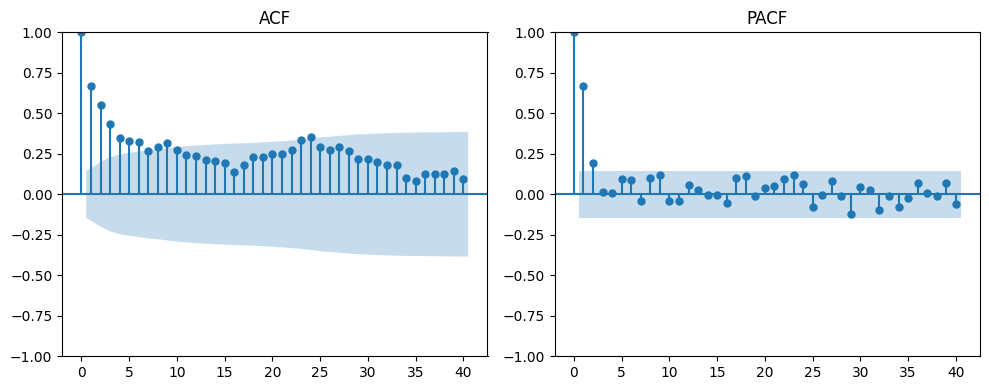

In [ ]:
# Graficos el ACF y PACF
y = df["inflacion"].dropna()

fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(1, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
plot_acf(y, ax=ax1, lags=40, alpha=0.05, title=f"ACF")

ax2 = fig.add_subplot(gs[0, 1])
plot_pacf(y, ax=ax2, lags=40, alpha=0.05, title=f"PACF")

plt.tight_layout()
plt.show()

# Nos encontramos ante un AR(1) con 99% o AR(2) con 95%

Ejercicio 6: Muestre el correlograma y el correlograma parcial de la serie de crec_m e indique qué le sugieren la función de autocorrelación y la función de autocorrelación parcial (es decir, si estamos frente a una serie de medias móviles o autorregresiva, y de qué orden).

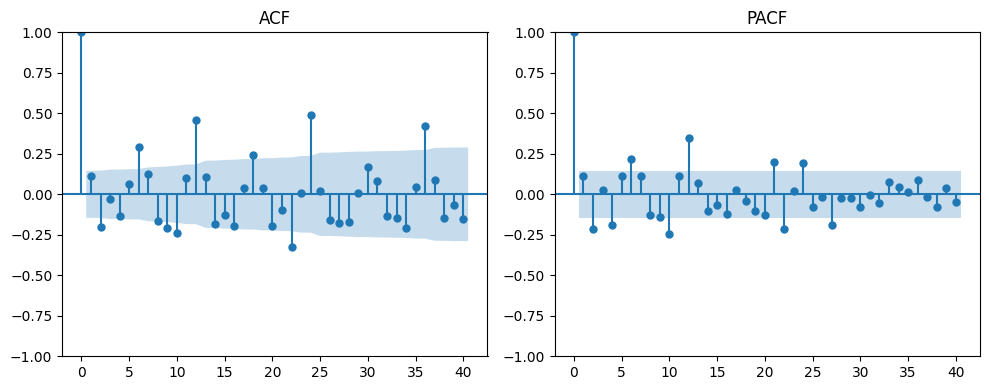

In [32]:
# Graficos el ACF y PACF
y = df["crec_m"].dropna()

fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(1, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
plot_acf(y, ax=ax1, lags=40, alpha=0.05, title=f"ACF")

ax2 = fig.add_subplot(gs[0, 1])
plot_pacf(y, ax=ax2, lags=40, alpha=0.05, title=f"PACF")

plt.tight_layout()
plt.show()

Ejercicio 7: cuando corremos regresiones con series de tiempo, las series involucradas deben tener el mismo orden de integración. Corra una regresión simple donde inflación es la variable dependiente y crec_m es la variable independiente, y con una constante. Muestre la regresión ¿Podemos decir que una mayor tasa de crecimiento de la base monetaria genera inflación? ¿Están los residuos de dicha regresión autocorrelacionados? ¿Qué haría si los residuos estuvieran correlacionados? Explique.

In [ ]:
y = df["inflacion"].dropna()
X = df["crec_m"].dropna()
X = sm.add_constant(X)

regmul = sm.OLS(y, X).fit()
print(regmul.summary())

# Al correr la regresion, se puede ver que la pendiente de -0.0141 no es muy distinta a 0, por lo que a simple vista, esto no afectaria tanto al crecimiento de la inflacion

                            OLS Regression Results                            
Dep. Variable:              inflacion   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.2784
Date:                Sat, 23 Aug 2025   Prob (F-statistic):              0.598
Time:                        19:00:44   Log-Likelihood:                 573.95
No. Observations:                 183   AIC:                            -1144.
Df Residuals:                     181   BIC:                            -1137.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0168      0.001     17.790      0.0

Durbin-Watson: 0.6649806231213486


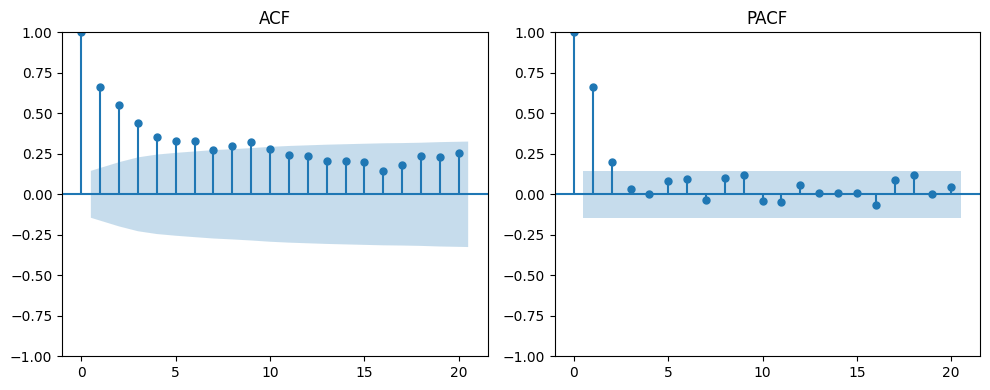

In [ ]:
# Calculo los residuos y corro DW sobre estos
from statsmodels.stats.stattools import durbin_watson

e = regmul.resid

dw = durbin_watson(e)
print("Durbin-Watson:", dw)

# Se observa que DW = 0.665 que es cercano a 0, con lo cual existe autocorrelacion positiva

y = e

fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(1, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
plot_acf(y, ax=ax1, lags=20, alpha=0.05, title=f"ACF")

ax2 = fig.add_subplot(gs[0, 1])
plot_pacf(y, ax=ax2, lags=20, alpha=0.05, title=f"PACF")

plt.tight_layout()
plt.show()

# Me queda que los residuos siguen un AR(1) al 99% o AR(2) al 95%; 
# porque la inflación (variable dependiente) es AR(1)/(2) y los residuos miden lo que la variable dependiente, acá inflación, no es explicada por crec_m (la variable independiente)

In [46]:
# Creo un modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

modelo = ARIMA(y, order=(1,1,0)).fit()
print(modelo.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  183
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 618.270
Date:                Sat, 23 Aug 2025   AIC                          -1232.540
Time:                        20:52:46   BIC                          -1226.132
Sample:                             0   HQIC                         -1229.943
                                - 183                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3359      0.049     -6.857      0.000      -0.432      -0.240
sigma2      6.551e-05   4.73e-06     13.846      0.000    5.62e-05    7.48e-05
Ljung-Box (L1) (Q):                   0.42   Jarque-

C:\Users\fsanches\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\fsanches\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\fsanches\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a